Chen Zihao

915490404

# STA 208: Homework 3 (Do not distribute)

## Due Monday 5/21/2018 in class and online by 10am

__Instructions:__ To make grading easier for the TAs please print out your homework and also submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1.1__ (10 pts)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
1. hinge loss: $\phi(x) = \max\{1-x,0\}$
1. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$
1. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


### 1.1.1 exponential loss: $\phi(x) = e^{-x}$,

$\phi''(x) = e^{-x}>0$, it is convex.

### 1.1.2 truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$

for $x>1$,$\phi(x) = 0$, for $x<1,\phi(x) = (1-x)^2>0$ is a parabola. 

for any $x\le 1,y\ge1$, we can see that  $\forall t \in [0,1],\phi(tx+(1-t)y)\le \phi(tx) \le t\phi(x)=t\phi(x)+(1-t)\phi(y)$

it is convex.

### 1.1.3 hinge loss: $\phi(x) = \max\{1-x,0\}$

for $x>1$,$\phi(x) = 0$ is a straight line, for $x<1,\phi(x) = 1-x$ is a straight line. Both line satisfies convex in its own region.  

for any $x\le 1,y\ge1$, we can see that  $\forall t \in [0,1],\phi(tx+(1-t)y)\le \phi(tx) = t\phi(x)=t\phi(x)+(1-t)\phi(y)$

it is convex.

### 1.1.4 sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$

$\tanh(z)=\frac {e^z-e^{-z}}{e^z+e^{-z}}$

$\phi(x) = 1 - \tanh(kx)=1 - \frac {e^{kx}-e^{-{kx}}}{e^{kx}+e^{-{kx}}} = \frac {2e^{-{kx}}}{e^{kx}+e^{-{kx}}} $

$\phi'(x) = \frac {-4k}{(e^{kx}+e^{-{kx}})^2} $

$\phi''(x) = \frac {8k^2(e^{kx}-e^{-{kx}})}{(e^{kx}+e^{-{kx}})^3} $

in order to let the second derivative greater than 0, we need 

$$
\begin{split}
e^{kx}-e^{-{kx}}&>0\\
kx&>-{kx}\\
x&>-x\\
x&>0
\end{split}
$$

which means it is not convex.

### 1.1.5 Plot these as a function of $x$.

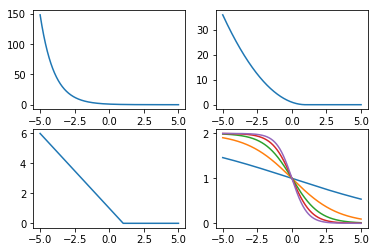

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
x = np.linspace(-5,5,1000)
y = [np.exp(i) for i in x]

plt.subplot(221)
plt.plot(x,[np.exp(-i) for i in x])

plt.subplot(222)
y = [(max(0,1-i))**2 for i in x]
plt.plot(x,y)

plt.subplot(223)
y = [(max(0,1-i)) for i in x]
plt.plot(x,y)

plt.subplot(224)
for k in np.arange(0.1,1.1,0.2):
    y = [1-np.tanh(k*i) for i in x]
    plt.plot(x,y)
plt.show()

__Exercise 1.2__ (20 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = (1-y_i x_i^\top \beta)_+^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
1. Demonstrate that the gradient does not have continuous derivative everywhere.
1. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top)_+$ with a ridge regularization.  Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
1. Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization.

### 1.2.1 

$$
R_n = \frac 1n\sum_{i=1}^n \ell(y_i,x_i,\beta) =\frac 1n \sum_{i=1}^n\phi(y_i x_i^\top \beta) = \frac 1n \sum_{i=1}^n(1-y_i x_i^\top \beta)_+^2
$$

$$
\frac {\partial R_n}{\partial \beta} = \frac 1n\sum_{i=1}^n \frac {\partial\ell(y_i,x_i,\beta)}{\partial \beta} =\frac 1n \sum_{i=1}^n\frac {\partial \phi(y_i x_i^\top \beta) }{\partial \beta}
$$

for $y_i x_i^\top \beta>1$,
$$
\frac {\partial \phi(y_i x_i^\top \beta) }{\partial \beta}=0
$$

for $y_i x_i^\top \beta<1$,
$$
\frac {\partial \phi(y_i x_i^\top \beta) }{\partial \beta}=2(1-y_i x_i^\top \beta)y_i x_i
$$

as $y_i x_i^\top \beta\rightarrow1^-$

$$
\frac {\partial \phi(y_i x_i^\top \beta) }{\partial \beta}=2(1-y_i x_i^\top \beta)y_i x_i\rightarrow 0
$$

which means $y_i x_i^\top \beta=1$ has 0 gradient in both sides.
It always exists.

### 1.2.2.
for $y_i x_i^\top \beta>1$,
$$
\frac {\partial \phi(y_i x_i^\top \beta) }{\partial \beta}=0
$$
it is a constent so that the seconde derivative is 0 when $y_i x_i^\top \beta>1$

for $y_i x_i^\top \beta<1$,
$$
\begin{split}
\frac {\partial \phi(y_i x_i^\top \beta) }{\partial \beta}&=2(1-y_i x_i^\top \beta)y_i x_i =2y_i x_i-2y_i x_i^\top \beta y_i x_i  \\
\frac {\partial^2 \phi(y_i x_i^\top \beta) }{\partial \beta^2}&=2y_i^2 x_i x_i^\top \ne 0 ,if x_i \ne 0\space and\space y_i \ne 0
\end{split}
$$

when $y_i x_i^\top \beta\to1$,the value of the second derivative of both sides is different,it is not continuous at this point so that the gradient does not have continuous derivative everywhere.

### 1.2.3.
 the regularized optimization method for the truncated quadratic loss
$$
\begin{split}
\min_\beta \frac 1 2 ||\beta||^2_2, s.t.\sum_{i=1}^n(1-y_ix_i^\top\beta)_+^2\le C\\
\min_\beta \frac 1 n \sum_{i=1}^n(1-y_ix_i^\top\beta)_+^2+\lambda||\beta||^2_2 := f(\beta)\\
\nabla f(\beta) = \frac 2 n \sum_{i=1}^n -(1-y_ix_i^\top\beta)_+y_ix_i^T+2\lambda \beta
\end{split}
$$

 the gradient of the regularized empirical risk is shown as above.


### 1.2.4.

$$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda.$$

$\forall z \in \mathbb R^n,s.t. z\ne 0$
$$
\begin{split}
z^\top G(\beta)z &= z^\top (\frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda)z\\
&= \frac 1n \sum_i 2 z^\top(x_i x_i^\top 1\{ y_i x_i^\top \beta > 1 \})z + 2 \lambda z^\top z\\
&= \frac 1n \sum_{y_i x_i^\top \beta > 1} 2 z^\top(x_i x_i^\top)z + 2 \lambda z^\top z\\
\end{split}
$$ 

Because $z^\top(x_i x_i^\top)z\ge0$ and $\lambda z^\top z>0$, we have $z^\top G(\beta)z>0$ which means it is positive definite.

Quasi-newton's methods:

1. initialize $\beta_k = 0$ and $\epsilon>0$
1. calculate $\nabla f(\beta_k) = \frac 2 n \sum_{i=1}^n -(1-y_ix_i^\top\beta_k)_+y_ix_i^T+2\lambda \beta_k$ 
1. calculate $G(\beta_k)= \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta_k > 1 \}) + 2 \lambda.$
1. $\beta_{k+1} = \beta_k - \frac {\nabla f(\beta_k)}{G(\beta_k)}$
1. if  $|\beta_{k+1} - \beta_{k}| > \epsilon$ go back to step 2, else, return $\beta_{k+1}$

__Exercise 1.3__ (20 pts)

1. Consider a high-dimensional embedding, $Z = \Phi(X)$ for the points and apply principal kernel analysis, consider the kernel matrix, how is its spectral decomposition related to the SVD of $Z$?  Suppose that we would like to have obtain the principal components (which here we define as $Z$ inner producted with the top right eigenvectors), how would you do that with accessing $K$ only?
2. Below is a simple simulation, apply kernel PCA with quadratic kernel using sklearn.  Plot the principle components, then reconstruct X with only the first PC and plot it with the data X.

### 1.3.1
$ k(x_i,x_j)=\Phi(x_i)^\top\Phi(x_j)$

let $C =\Phi(X)^\top\Phi(X) = Z^\top Z$

let the eigenvalue and eigenvector of $C$ is $\lambda_k$ and $v_k$, in other words:

$C v_k = \lambda_k v_k(k=1,2,3,...,D)$ where D is the dimension of the high-dimension space.

$v_k\in span \{\Phi(x_1),...,\Phi(x_N)\}$, which means $\exists \alpha_{k1},...,\alpha_{kN}$ such that

$v_k = \sum_{i=1}^N\alpha_{ki}\Phi(x_i)$

$$
\begin{split}
C v_k &= \lambda_k v_k\\
\lambda_k\Phi(x_j)^\top v_k& =\Phi(x_j)^\top  C v_k\\
left& = \lambda_k\Phi(x_j)^\top (\sum_{i=1}^N\alpha_{ki}\Phi(x_i))\\
& =\lambda_k (\sum_{i=1}^N\alpha_{ki}\Phi(x_j)^\top\Phi(x_i))\\
& =\lambda_k (\sum_{i=1}^N\alpha_{ki} k(x_j,x_i))\\
& =\lambda_k ( K\alpha_{k})_j\\
\end{split}
$$

where $ K = ( k(x_i,x_j))_{N\times N}, \alpha_{k}=(\alpha_{k1},...,\alpha_{kN})^\top$

$$
\begin{split}
\lambda_k\Phi(x_j)^\top v_k& =\Phi(x_j)^\top  C v_k\\
right &= \Phi(x_j)^\top \sum_l^N \Phi(x_l)\Phi(x_l)^\top\sum_i^N\alpha_{ki}\Phi(x_i)\\
&=\sum_i^N\sum_l^N\alpha_{ki}\Phi(x_j)^\top\Phi(x_l)\Phi(x_l)^\top\Phi(x_i)\\
&= \sum_i^N\sum_l^N\alpha_{ki} k(x_j,x_l) k(x_l,x_i)\\
&=( K^2\alpha_{k})_j\\
\end{split}
$$

left = right for all j so that we have 

$$
\begin{split}
\lambda_k K\alpha_k &= K^2 \alpha_k\\
 K\alpha_k &= \lambda_k\alpha_k\\
\end{split}
$$

which means the eigenvalue of the kernel matrix K is $\lambda_k$ where $\lambda_k$ is also the eigenvlue of $ C =\Phi(X)^\top\Phi(X)$,

the eigenvector of C $v_k = \sum_i^N \alpha_{ki}\Phi(x_i) = \Phi \alpha_k$ where $\Phi = (\Phi(x_1),...,\Phi(x_N))$
$$
\begin{split}
v^\top_iv_j &= \alpha_i^\top  \Phi^\top  \Phi \alpha_k\\
& = \alpha_i^\top  K \alpha_k\\
& = \alpha_i^\top  \lambda_k \alpha_k\\
& =  \lambda_k \alpha_i^\top \alpha_k\\
& = 0
\end{split}
$$
what's more, we want $v_k$ is a unit vector:
$$
\begin{split}
1 &= v^\top_kv_k\\
& = \alpha_k^\top  \Phi^\top  \Phi \alpha_k\\
& = \alpha_k^\top  K \alpha_k\\
& = \alpha_k^\top  \lambda_k \alpha_k\\
& =  \lambda_k \alpha_k^\top \alpha_k\\
& =  \lambda_k ||\alpha_k||^2\\
||\alpha_k|| & = \frac 1 {\sqrt{\lambda_k}}
\end{split}
$$

To sum up, $C$ has eigenvalue $\lambda_k$ and eigenvector $v_k = \frac 1 {\sqrt{ \lambda_k}} \Phi\alpha_k$ and $\lambda_k$ and $\alpha_k$ are the eigenvalue and eigenvector of kernel matrix K.

To get the first PC, use kernel trick $K(x_i,t)$
$$
v_1^T\Phi(t) = \sum_i^N\frac {\alpha_{1i}}{\sqrt\lambda_k}K(x_i,t)
$$

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
n = 100
X = np.random.normal(0,.5,size=(n,2))
Theta = 2.*np.pi*np.arange(n)/n
X[:,0] += 3.*np.sin(Theta)
X[:,1] += 3.*np.cos(Theta)

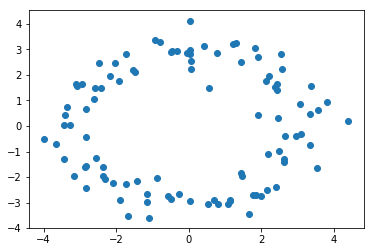

In [4]:
plt.scatter(X[:n,0],X[:n,1])
plt.show()

In [5]:
from sklearn.decomposition import PCA, KernelPCA
kpca = KernelPCA(kernel="poly",degree=2)
X_kpca = kpca.fit_transform(X)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

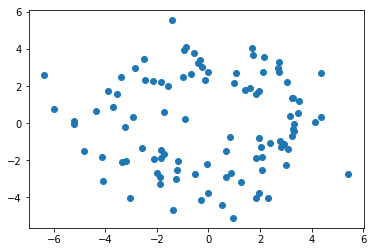

In [6]:
plt.scatter(X_kpca[:,0],X_kpca[:,1])
plt.show()

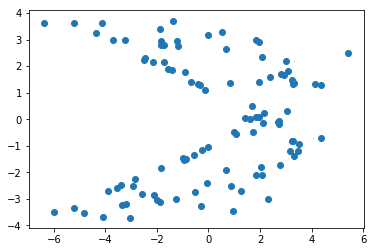

In [7]:
plt.scatter(X_kpca[:,0],X_pca[:,0])
plt.show()

__Exercise 4.__ (50 pts) Below is an import of a reuters data.  I have written a def to process a single file.  Construct a response variable with has three categories, if the topic is 'earn', 'acq', or another category.  Import all of the data and construct a kernel matrix between the documents based on the overlap of words in the body of the document (you can choose the notion of similarity, but try to make it make sense).  Try including into your kernel the overlap between the places.  Use sklearn svm.SVC with this as the precomputed kernel to fit on the data in the TRAIN split and predict on the TEST split.  Plot your ROC and PR curves for predicting 'earn' (versus everything else) and compare several different versions of the kernel.

In [8]:
from lxml import html, etree

In [9]:
reu = html.parse("reuters/reut2-000.sgm") #You will have to do this for all sgm files here

In [10]:
import nltk
nltk.download()
# Download Corpora -> stopwords, Models -> punkt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [11]:
def parse_reu(reu):
    """Parses the etree object and returns a list of dictionary of reuters attr
    Output: {'topics': the topic of the article, 'places': where it is located, 
        'split': training/test split, 'body':the text of the article as a set of words with stopwords removed}
    """
    root= reu.getroot()
    articles = root.body.getchildren()
    stop_words = set(stopwords.words('english'))
    reu_pl = []
    for a in articles:
        reu_parse = {}
        if a.attrib['topics'] != 'YES':
            next
        topics = a.find('topics').findall('d')
        if topics:
            reu_parse['topics'] = [t.text for t in topics]
        else:
            reu_parse['topics'] = []
        places = a.find('places').findall('d')
        if places:
            reu_parse['places'] = [t.text for t in places]
        reu_parse['split'] = a.attrib['lewissplit']
        rtxt = a.find('text')
        word_tokens = word_tokenize(rtxt.text_content())
        filtered_sentence = set([w.lower() for w in word_tokens if not w in stop_words])
        reu_parse['body'] = filtered_sentence
        reu_pl.append(reu_parse)
    return reu_pl

In [12]:
reu_pl = parse_reu(reu)

In [13]:
print(reu_pl[0]['topics'])
" ".join(reu_pl[0]['body'])

['cocoa']


'trade dec sold 28 thousand 26 routine selling total come dry end arrivals 27 named 1987/88 salvador 5.81 estimated still feb week weekly 45 destinations 5.93 stage 60 4,400 cake convertible 1986/87 again new although humidity view 0.39 bahia cruzados going argentina said last february available sales currency times uruguay 1.06 4,345 published ports aug/sept 2,325 currently 4,350 old would 1,870 15 lower cumulative 1,780 sept bags 995 improving reuter fit the 6.4 exporters 340 commission u.s. also 4,450 shippers obtaining there hands dificulties oct/dec late making march/april limited booked earlier july showers final made - restored export 1.25 middlemen zone march cocoa 4,340 estimates offer carnival butter recent since early period york june/july 35 6.13 nearby april/may may drought year tonne season areas 785 weeks doubt normal per rose consignment 2,400 ended around certificates almost buyers seems 2,375 . liquor review delivered open included prices throughout 753 hundred practi

In [14]:
#read all the data
reu_pl = []
for i in range(0,22):
    n=str(i)
    s = n.zfill(3)
    reu = html.parse("reuters/reut2-"+s+".sgm")
    reu_pl.extend(parse_reu(reu))
#get rid of the data that labeled as 'NOT-USED'
reu_pl = [x for x in reu_pl if not x["split"]=='NOT-USED']

In [15]:
# Construct a response variable with three categories
for i in range(len(reu_pl)):
    if "earn" in reu_pl[i]["topics"]:
        reu_pl[i]["categories"]=1
    elif "acq" in reu_pl[i]["topics"]:
        reu_pl[i]["categories"]=2
    else: reu_pl[i]["categories"]=0
response = [i["categories"] for i in reu_pl]

In [16]:
#this code is from STA141B, get rid of the morphological changes
from nltk.corpus import wordnet
from textblob import TextBlob

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)


for i in range(len(reu_pl)):
    blob = TextBlob(" ".join(reu_pl[i]["body"]))
    tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
    reu_pl[i]["body2"] = set(x.lemmatize(t) for x, t in zip(blob.words, tags))

In [17]:
# seperate the training data and the test data.
X_train = [x for x in reu_pl if x["split"]=="TRAIN"]
X_test = [x for x in reu_pl if x["split"]=="TEST"]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer  

words1 = []
for i in X_train:
    words1.append(" ".join(i["body2"]))
    
words2 = []
for i in X_test:
    words2.append(" ".join(i["body2"]))

#make sure the dictionary of training data and test data is the same one.
word = []
word.extend(words1)
word.extend(words2)

vectorizer = CountVectorizer()  
A = vectorizer.fit_transform(word)
train = A[:len(words1),:]
test = A[len(words1):,:]

kernel_fit =train@train.T
kernel_predict = test@train.T

In [19]:
from sklearn import svm
from scipy import sparse
SVC = svm.SVC(kernel = "precomputed",probability = True)
SVC.fit(kernel_fit.toarray(),response[:len(X_train)])
predict = SVC.predict_proba(kernel_predict.toarray())
predict2 = SVC.predict(kernel_predict.toarray())

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(response[len(X_train):],predict2)

array([[3374,  759,  251],
       [ 286,  729,   73],
       [ 218,   59,  439]], dtype=int64)

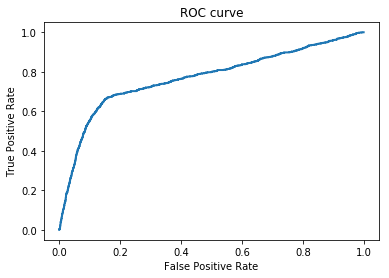

In [21]:
from sklearn.metrics import roc_curve
true = response[len(X_train):].copy()

for i in range(len(true)):
    if true[i] == 2:
        true[i] = 0
fpr, tpr, thresholds = roc_curve(true,predict[:, 1]) 
plt.plot(fpr, tpr, lw=2) 
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.title('ROC curve')  
plt.show() 

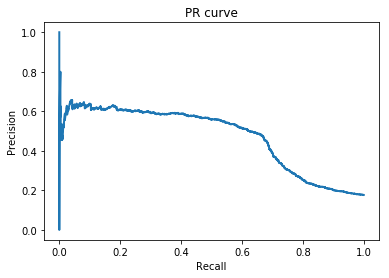

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(true,predict[:, 1])
plt.plot(recall,precision, lw=2) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')  
plt.show() 

In [23]:
SVC = svm.SVC(kernel="rbf",probability = True)
SVC.fit(train,response[:len(X_train)])
predict = SVC.predict_proba(test)

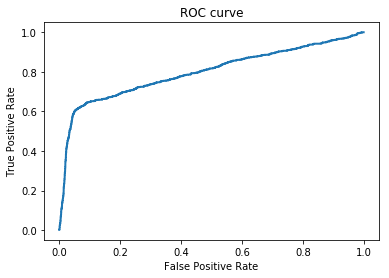

In [25]:
fpr, tpr, thresholds = roc_curve(true,predict[:, 1]) 
plt.plot(fpr, tpr, lw=2) 
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.title('ROC curve')  
plt.show() 

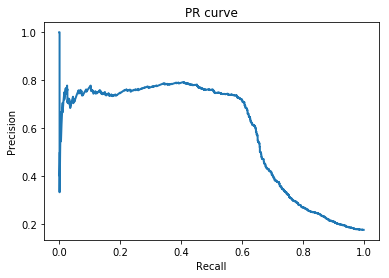

In [24]:
precision, recall, _ = precision_recall_curve(true,predict[:, 1])
plt.plot(recall,precision, lw=2) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')  
plt.show() 